In [1]:
import pandas as pd
import numpy as np

In [12]:
data=[[2, 3, 5], [3,4,7], [4,6,9],[5,8,11]]

df = pd.DataFrame(columns=['x1', 'x2', 'x3'], data=data)

In [13]:
df

,x1,x2,x3
0,2,3,5
1,3,4,7
2,4,6,9
3,5,8,11


In [14]:
#calculate the mean vector
mean_vector = df.mean()
mean_vector

x1    3.50
x2    5.25
x3    8.00
dtype: float64

In [15]:
#calculate the covariance matrix
cov_matrix = df.cov()
cov_matrix

,x1,x2,x3
x1,1.666667,2.833333,3.333333
x2,2.833333,4.916667,5.666667
x3,3.333333,5.666667,6.666667


In [8]:
import numpy as np

# Parameters for the Gamma distribution
alpha = np.array([2, 3, 4])
beta = np.array([1, 1, 2])

# Sampling inverse lengthscales from the Gamma distribution
rho = np.random.gamma(alpha, 1.0 / beta)

print("Sampled inverse lengthscales:", rho)


Sampled inverse lengthscales: [1.23449221 2.5702943  1.34818794]


In [10]:
# Define the points
x = np.array([1.0, 2.0, 3.0])
x_prime = np.array([1.5, 2.5, 3.5])

# Compute the squared differences
squared_diff = (x - x_prime) ** 2
print("Squared differences:", squared_diff)

# Compute the kernel value using the sampled inverse lengthscales
kernel_value = np.exp(-0.5 * np.sum(rho**2 * squared_diff))

print("Kernel value:", kernel_value)


Squared differences: [0.25 0.25 0.25]
Kernel value: 0.28837334248826413


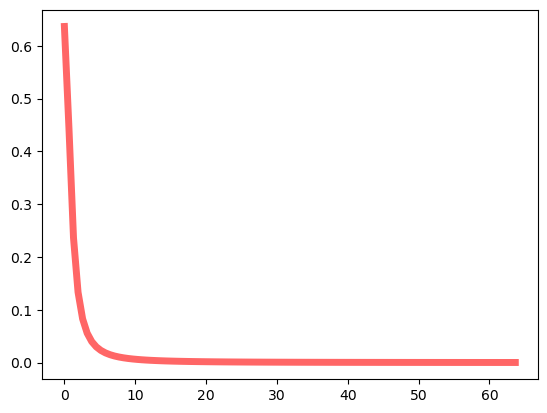

In [6]:
# use the half-cauchy distribution to sample the noise level
from scipy.stats import halfcauchy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = halfcauchy.stats(moments='mvsk')
x = np.linspace(halfcauchy.ppf(0.01),
                halfcauchy.ppf(0.99), 100)
ax.plot(x, halfcauchy.pdf(x),
       'r-', lw=5, alpha=0.6, label='halfcauchy pdf')
plt.show()

In [13]:
import numpy as np

# Parameters for the Gamma distribution
alpha = np.array([2, 3, 4])
beta = np.array([1, 1, 2])

# Sampling inverse lengthscales from the Gamma distribution
rho = np.random.gamma(alpha, 1.0 / beta)

print("Sampled inverse lengthscales:", rho)


Sampled inverse lengthscales: [3.85919134 6.59052635 1.01440717]


In [14]:
# Example dataset with 3 samples and 3 features
X = np.array([
    [1.0, 2.0, 3.0],
    [1.5, 2.5, 3.5],
    [2.0, 3.0, 4.0]
])

print("Dataset X:")
print(X)


Dataset X:
[[1.  2.  3. ]
 [1.5 2.5 3.5]
 [2.  3.  4. ]]


In [15]:
# Compute the RBF kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        squared_diff = (X[i] - X[j]) ** 2
        K[i, j] = np.exp(-0.5 * np.sum(rho**2 * squared_diff))

print("RBF Kernel Matrix K:")
print(K)


RBF Kernel Matrix K:
[[1.00000000e+00 5.99342610e-04 1.29032948e-13]
 [5.99342610e-04 1.00000000e+00 5.99342610e-04]
 [1.29032948e-13 5.99342610e-04 1.00000000e+00]]


In [18]:
import numpy as np

# Step 1: Parameters for the Gamma distribution (priors for inverse lengthscales)
alpha = np.array([2, 3, 4])
beta = np.array([1, 1, 2])

# Step 2: Sampling inverse lengthscales from the Gamma distribution
rho = np.random.gamma(alpha, 1.0 / beta)

print("Sampled inverse lengthscales:", rho)

# Step 3: Define the dataset with 3 samples and 3 features
X = np.array([
    [1.0, 2.0, 3.0],
    [1.5, 2.5, 3.5],
    [2.0, 3.0, 4.0]
])

print("\nDataset X:")
print(X)

# Step 4: Compute the RBF kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        squared_diff = (X[i] - X[j]) ** 2
        K[i, j] = np.exp(-0.5 * np.sum(rho**2 * squared_diff))

print("\nRBF Kernel Matrix K:")
print(K)


Sampled inverse lengthscales: [6.48991326 0.86749636 1.63608825]

Dataset X:
[[1.  2.  3. ]
 [1.5 2.5 3.5]
 [2.  3.  4. ]]

RBF Kernel Matrix K:
[[1.00000000e+00 3.36765507e-03 1.28620564e-10]
 [3.36765507e-03 1.00000000e+00 3.36765507e-03]
 [1.28620564e-10 3.36765507e-03 1.00000000e+00]]


In [ ]:




# Function to plot the GP
def plot_gp(model, title):
    model.eval()
    with torch.no_grad():
        x_plot_torch = torch.linspace(-3, 3, 100).unsqueeze(-1)
        observed_pred = model(x_plot_torch)
        mean = observed_pred.mean.numpy()
        lower, upper = observed_pred.confidence_region()
        
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, true_function(x_plot), 'b-', label='True function')
    plt.plot(x_plot, mean, 'r-', label='GP mean')
    plt.fill_between(x_plot, lower.numpy(), upper.numpy(), alpha=0.3, label='Confidence')
    plt.scatter(X, y, c='k', label='Observed data')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot initial GP
plot_gp(model, "Initial GP (Before Optimization)")

# Optimize the model
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_model(mll)

print("\nOptimized model parameters:")
print("Lengthscale:", model.covar_module.base_kernel.lengthscale.item())
print("Outputscale:", model.covar_module.outputscale.item())
print("Mean constant:", model.mean_module.constant.item())

# Plot optimized GP
plot_gp(model, "Optimized GP (After Optimization)")

# Make predictions
test_x = torch.tensor([[1.5]])
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = model(test_x)
    mean = observed_pred.mean
    lower, upper = observed_pred.confidence_region()

print(f"\nPrediction at x = 1.5:")
print(f"Mean: {mean.item():.4f}")
print(f"95% Confidence Interval: ({lower.item():.4f}, {upper.item():.4f})")

In [36]:
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood

# Set random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Generate synthetic data
def true_function(x):
    return np.sin(3*x) + 0.3*np.cos(9*x)

X = np.random.rand(10, 1) * 6 - 3  # 10 random points between -3 and 3
y_no_noise = true_function(X)   # Add some noise
y = y_no_noise + 0.2 * np.random.randn(10, 1)
# Convert to torch tensors
X_torch = torch.from_numpy(X).float()
y_torch = torch.from_numpy(y).float()

print("Generated data:")
print("X:", X_torch)
print("y:", y_torch)

Generated data:
X: tensor([[ 0.2929],
        [ 1.2911],
        [ 0.6166],
        [ 0.2693],
        [-0.4581],
        [ 0.8754],
        [-0.3745],
        [ 2.3506],
        [ 2.7820],
        [-0.6994]])
y: tensor([[ 0.5362],
        [-0.2019],
        [ 1.3363],
        [ 0.5212],
        [-1.0588],
        [ 0.5524],
        [-0.8950],
        [ 0.4529],
        [ 1.2427],
        [-0.7350]])


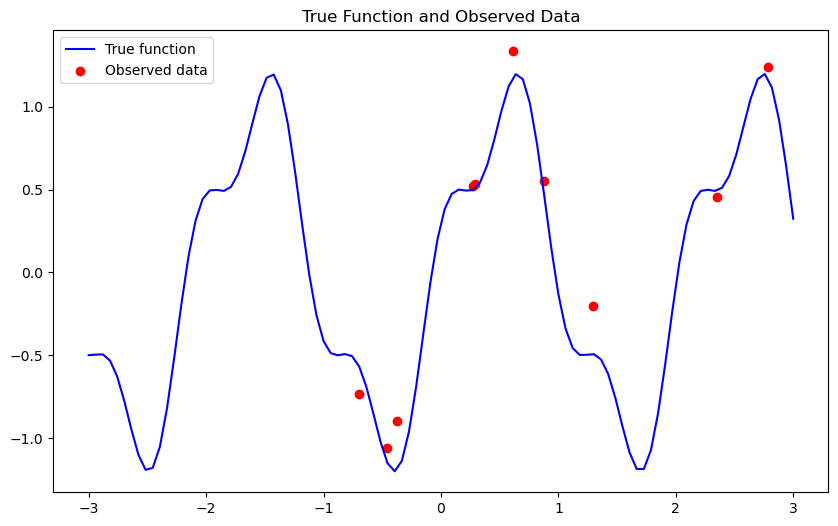

In [37]:
# Plot the true function and data points
x_plot = np.linspace(-3, 3, 100)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, true_function(x_plot), 'b-', label='True function')
plt.scatter(X, y, c='r', label='Observed data')
plt.title("True Function and Observed Data")
plt.legend()
plt.show()

In [38]:
# Define the GP model
class ExampleGP(SingleTaskGP):
    def __init__(self, train_X, train_Y):
        super().__init__(train_X, train_Y)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize the model
model = ExampleGP(X_torch, y_torch)

print("\nInitial model parameters:")
print("Lengthscale:", model.covar_module.base_kernel.lengthscale.item())
print("Outputscale:", model.covar_module.outputscale.item())
print("Mean constant:", model.mean_module.constant.item())


Initial model parameters:
Lengthscale: 0.6931471824645996
Outputscale: 0.6931471824645996
Mean constant: 0.0


/var/folders/qf/pmcgmztj4v91fy0j9fq_m9kc0000gn/T/ipykernel_10460/1342365786.py:4: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  super().__init__(train_X, train_Y)
/Users/ramseyissa/miniconda3/envs/nmr_peaks/lib/python3.11/site-packages/botorch/models/utils/assorted.py:257: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(
/Users/ramseyissa/miniconda3/envs/nmr_peaks/lib/python3.11/site-packages/botorch/models/utils/assorted.py:260: InputDataWarning: Data is not standardized (std = tensor([0.8561]), mean = tensor([0.1751])). Please consider scaling the input to zero mean and unit variance.
  check_standardization(Y=train_Y, raise_on_fail=raise_on_fail)


/Users/ramseyissa/miniconda3/envs/nmr_peaks/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/ramseyissa/miniconda3/envs/nmr_peaks/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


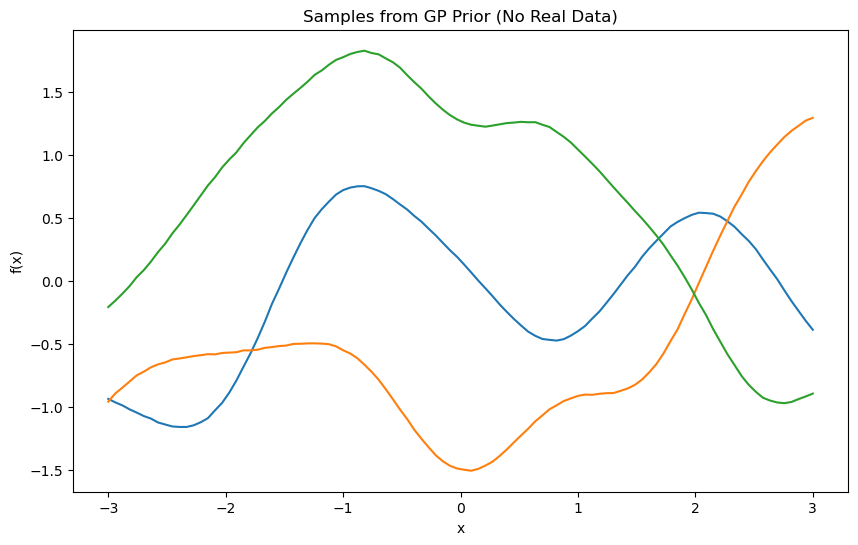

Initial Hyperparameters:
Lengthscale: 0.6931
Outputscale: 0.6931
Mean constant: 0.0000


In [42]:
import torch
import gpytorch
import matplotlib.pyplot as plt

class ExampleGP(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize the model with dummy data
dummy_x = torch.zeros(1, 1)
dummy_y = torch.zeros(1)
likelihood = gpytorch.likelihoods.GaussianLikelihood()
prior_model = ExampleGP(dummy_x, dummy_y, likelihood)

# Set the model to eval mode
prior_model.eval()

# Generate input points for visualization
x = torch.linspace(-3, 3, 100).unsqueeze(-1)

# Sample from the prior
with torch.no_grad(), gpytorch.settings.prior_mode(True):
    prior_samples = prior_model(x).sample(sample_shape=torch.Size([3]))

# Visualize the samples
plt.figure(figsize=(10, 6))
for sample in prior_samples:
    plt.plot(x.numpy(), sample.numpy())
plt.title("Samples from GP Prior (No Real Data)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Print initial hyperparameters
print("Initial Hyperparameters:")
print(f"Lengthscale: {prior_model.covar_module.base_kernel.lengthscale.item():.4f}")
print(f"Outputscale: {prior_model.covar_module.outputscale.item():.4f}")
print(f"Mean constant: {prior_model.mean_module.constant.item():.4f}")

In [155]:
# generate 20 samples from the uniform distribution
np.random.seed(0)
samples = np.random.uniform(-1, 1, 20)
samples

def y(w0, w1, x,size):
    y_true = w0 + w1 * x
    y_noise = y_true + np.random.normal(0, 0.2, len(size))
    return y_noise

   
samples

array([ 0.09762701,  0.43037873,  0.20552675,  0.08976637, -0.1526904 ,
        0.29178823, -0.12482558,  0.783546  ,  0.92732552, -0.23311696,
        0.58345008,  0.05778984,  0.13608912,  0.85119328, -0.85792788,
       -0.8257414 , -0.95956321,  0.66523969,  0.5563135 ,  0.7400243 ])

In [84]:
prior = np.random.multivariate_normal(mean=[0,0], cov=2*np.eye(2), size = 100)
prior

array([[-0.0240705 ,  0.53620153],
       [ 3.19514536, -0.05976064],
       [-1.35191038, -0.48929212],
       [-0.65562371,  0.68091763],
       [-2.17901603,  0.08946597],
       [ 0.22133367,  0.32835357],
       [-0.84473249, -0.33647214],
       [-2.01392625, -0.69765967],
       [-0.76772206,  0.58838362],
       [-1.63508888,  1.10478095],
       [ 2.11352031, -2.9274009 ],
       [ 0.60282088,  0.95729252],
       [-0.90147209, -0.56182719],
       [-0.18792151, -0.4211399 ],
       [-0.43701033, -2.37022731],
       [ 1.62964293,  1.52681126],
       [-1.15027077, -2.07383717],
       [ 0.73689702, -0.81428716],
       [ 0.20075209, -0.45159858],
       [ 0.97798348,  0.98252366],
       [-1.02614965, -1.95637207],
       [-2.23861295,  0.8632068 ],
       [-1.68130089, -0.71674656],
       [-0.8433154 , -0.07434138],
       [-2.73831316,  0.26697325],
       [ 0.74089379,  0.12504771],
       [-0.43965944,  0.13774464],
       [ 0.56433675, -3.92103828],
       [ 2.76607771,

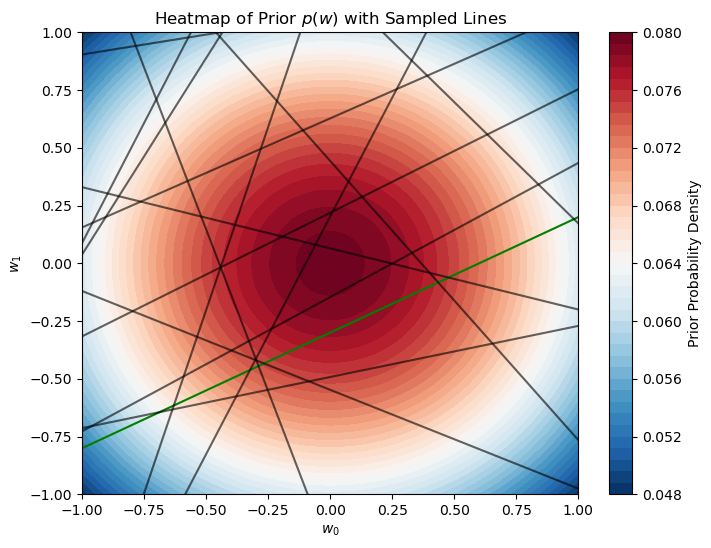

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. Define the grid for w0 and w1
w0_range = np.linspace(-1, 1, 100)
w1_range = np.linspace(-1, 1, 100)
w0_grid, w1_grid = np.meshgrid(w0_range, w1_range)

# 2. Define the prior mean and covariance
mean = np.array([0, 0])
cov = 2 * np.eye(2)

# 3. Compute the prior probability for each point on the grid
pos = np.dstack((w0_grid, w1_grid))
prior_pdf = multivariate_normal(mean, cov).pdf(pos)
x_values = np.linspace(-1, 1, 100)
# 4. Plot the heat map
plt.figure(figsize=(8, 6))
plt.contourf(w0_grid, w1_grid, prior_pdf, levels=50, cmap='RdBu_r')
plt.plot(x_values, y(-0.3,0.5,x_values,noise=False),c='green' ,label='True w')
plt.colorbar(label='Prior Probability Density')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Heatmap of Prior $p(w)$')
plt.grid(False)

# 5. Sample 20 instances of w from the prior
np.random.seed(0)
samples_w = np.random.multivariate_normal(mean, cov, 20)

# 6. Plot the lines y = w0 + w1 * x for each sampled w
x_values = np.linspace(-1, 1, 100)
for w in samples_w:
    w0, w1 = w
    y_values = w0 + w1 * x_values
    plt.plot(x_values, y_values, color='black', alpha=0.6)

# 7. Finalize and show the plot
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Heatmap of Prior $p(w)$ with Sampled Lines')
plt.show()


In [139]:
x1 = samples[0]
x1

0.0976270078546495

In [143]:
w0,w1 = samples_w[0]
y1= w0 + w1 * samples[0]
y1

2.5499946328704923

In [156]:
# generate 20 samples from the uniform distribution
# np.random.seed(0)
# samples = np.random.uniform(-1, 1, 20)
samples

def y(w0, w1, x):
    y_true = w0 + w1 * x
    y_noise = y_true + np.random.normal(0, 0.2)
    return y_noise

In [247]:
X_ = np.ones((2,100))
X_[1,:] = np.linspace(-1, 1, 100)
X_

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

In [157]:
y_1_true = y(-0.3,0.5,x1)

y_1_true

0.24881581463152125

In [180]:
for i in range(w0_grid.shape[0]):
    for j in range(w0_grid.shape[1]):
        w0, w1 = w0_grid[i, j], w1_grid[i, j]
        print(w0, w1)

-1.0 -1.0
-0.9797979797979798 -1.0
-0.9595959595959596 -1.0
-0.9393939393939394 -1.0
-0.9191919191919192 -1.0
-0.898989898989899 -1.0
-0.8787878787878788 -1.0
-0.8585858585858586 -1.0
-0.8383838383838383 -1.0
-0.8181818181818181 -1.0
-0.797979797979798 -1.0
-0.7777777777777778 -1.0
-0.7575757575757576 -1.0
-0.7373737373737373 -1.0
-0.7171717171717171 -1.0
-0.696969696969697 -1.0
-0.6767676767676767 -1.0
-0.6565656565656566 -1.0
-0.6363636363636364 -1.0
-0.6161616161616161 -1.0
-0.5959595959595959 -1.0
-0.5757575757575757 -1.0
-0.5555555555555556 -1.0
-0.5353535353535352 -1.0
-0.5151515151515151 -1.0
-0.4949494949494949 -1.0
-0.4747474747474747 -1.0
-0.4545454545454545 -1.0
-0.43434343434343425 -1.0
-0.41414141414141414 -1.0
-0.3939393939393939 -1.0
-0.3737373737373737 -1.0
-0.3535353535353535 -1.0
-0.33333333333333326 -1.0
-0.31313131313131304 -1.0
-0.2929292929292928 -1.0
-0.2727272727272727 -1.0
-0.2525252525252525 -1.0
-0.23232323232323226 -1.0
-0.21212121212121204 -1.0
-0.191919191

In [176]:

# Noise variance (sigma^2 = 1/25)
sigma_squared = 1 / 25

# Create a grid for likelihood
likelihood_pdf = np.zeros_like(w0_grid)

# Loop over the grid to compute the likelihood
for i in range(w0_grid.shape[0]):
    for j in range(w0_grid.shape[1]):
        w0, w1 = w0_grid[i, j], w1_grid[i, j]
        # Model prediction for the current w0, w1
        y_pred = w0 + w1 * x1
        # Compute the likelihood of observing y1 given the prediction
        likelihood_pdf[i, j] = multivariate_normal(mean=y_pred, cov=sigma_squared).pdf(y_1_true)

# Now, likelihood_pdf contains the likelihood for each (w0, w1) on the grid
posterior_pdf = prior_pdf * likelihood_pdf
posterior_pdf /= np.sum(posterior_pdf)
# posterior_pdf


#sample from the posterior distribution
posterior_flat = posterior_pdf.flatten()
w0_flat = w0_grid.flatten()
w1_flat = w1_grid.flatten()
num_samples = 20

sample_indices = np.random.choice(len(posterior_flat), num_samples, p=posterior_flat)
sampled_w0 = w0_flat[sample_indices]
sampled_w1 = w1_flat[sample_indices]
sampled_w0, sampled_w1

In [219]:
#sample from the posterior distribution
# posterior_flat = posterior_pdf.flatten()
# w0_flat = w0_grid.flatten()
# w1_flat = w1_grid.flatten()
# num_samples = 20

# sample_indices = np.random.choice(len(posterior_flat), num_samples, p=posterior_flat)
# sampled_w0 = w0_flat[sample_indices]
# sampled_w1 = w1_flat[sample_indices]
# sampled_w0, sampled_w1

(array([ 0.85858586, -0.21212121,  0.35353535,  0.29292929, -0.19191919,
         0.39393939,  0.05050505, -0.19191919,  0.71717172, -0.09090909,
         0.57575758, -0.03030303,  0.25252525,  0.57575758,  0.67676768,
         0.03030303,  0.35353535,  0.29292929,  0.75757576, -0.07070707]),
 array([-0.95959596,  0.65656566,  0.53535354,  0.71717172,  0.95959596,
         0.57575758, -0.03030303,  0.55555556, -0.71717172,  0.29292929,
        -0.65656566,  0.87878788,  0.07070707, -0.13131313, -0.41414141,
         0.53535354, -0.05050505,  0.15151515, -0.95959596,  0.25252525]))

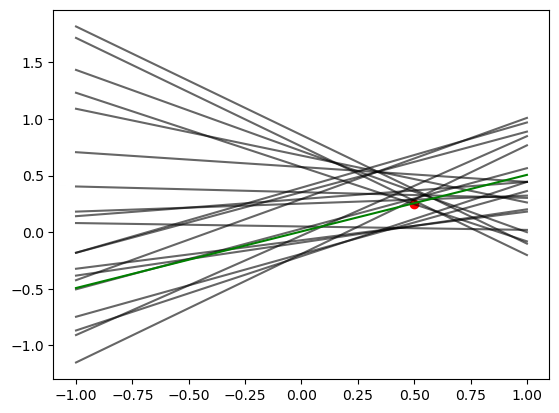

In [232]:
xvals = np.linspace(-1, 1, 20)
for i in range(num_samples):
    yvals = sampled_w0[i] + sampled_w1[i] * xvals
    plt.plot(xvals, yvals, color='black', alpha=0.6)

plt.scatter(x1, y_1_true, color='red', label='Observed data')
plt.plot(xvals, y(-0.3,0.5,xvals), color='green', label='True w')
# yvals = sampled_w0 + sampled_w1 * xvals
# yvals
# plt.figure(figsize=(8, 6))
# for i in range(num_samples):
#     plt.plot(xvals, yvals[i], color='black', alpha=0.6)

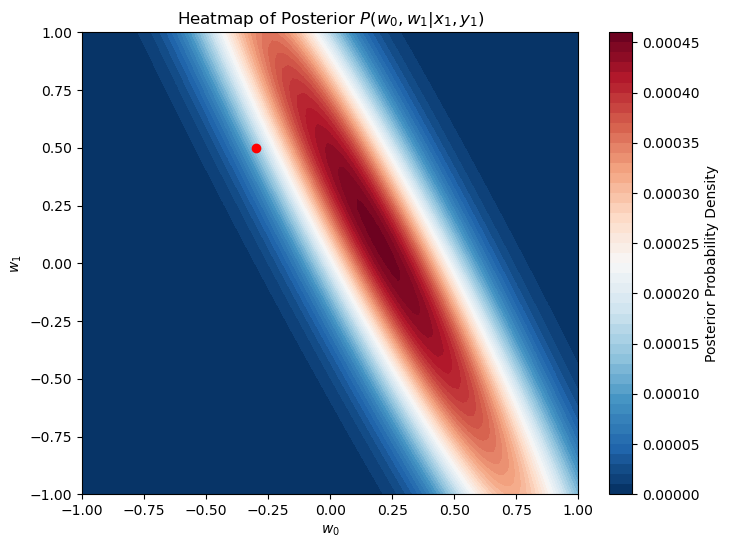

In [207]:
plt.figure(figsize=(8, 6))
plt.contourf(w0_grid, w1_grid, posterior_pdf, levels=50, cmap='RdBu_r')
plt.plot(-0.3,0.5, 'ro', label='True w')
plt.colorbar(label='Posterior Probability Density')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Heatmap of Posterior $P(w_0, w_1 | x_1, y_1)$')
plt.grid(False)
plt.show()


In [234]:
x_5 = samples[:5]
x_5
y_5_true = y(-0.3,0.5,x_5)
y_5_true

array([ 0.04268526,  0.20906112,  0.09663513,  0.03875494, -0.08247345])

In [235]:
# Noise variance (sigma^2 = 1/25)
sigma_squared = 1 / 25

# Create a grid for likelihood
likelihood_pdf = np.zeros_like(w0_grid)

# Loop over the grid to compute the likelihood
for i in range(w0_grid.shape[0]):
    for j in range(w0_grid.shape[1]):
        w0, w1 = w0_grid[i, j], w1_grid[i, j]
        # Model prediction for the current w0, w1
        y_pred = w0 + w1 * x1
        # Compute the likelihood of observing y1 given the prediction
        likelihood_pdf[i, j] = multivariate_normal(mean=y_pred, cov=sigma_squared).pdf(y_5_true)

# Now, likelihood_pdf contains the likelihood for each (w0, w1) on the grid
posterior_pdf = prior_pdf * likelihood_pdf
posterior_pdf /= np.sum(posterior_pdf)
# posterior_pdf


#sample from the posterior distribution
posterior_flat = posterior_pdf.flatten()
w0_flat = w0_grid.flatten()
w1_flat = w1_grid.flatten()
num_samples = 20

sample_indices = np.random.choice(len(posterior_flat), num_samples, p=posterior_flat)
sampled_w0 = w0_flat[sample_indices]
sampled_w1 = w1_flat[sample_indices]
sampled_w0, sampled_w1



xvals = np.linspace(-1, 1, 20)
for i in range(num_samples):
    yvals = sampled_w0[i] + sampled_w1[i] * xvals
    plt.plot(xvals, yvals, color='black', alpha=0.6)

plt.scatter(x1, y_5_true, color='red', label='Observed data')
plt.plot(xvals, y(-0.3,0.5,xvals), color='green', label='True w')

ValueError: setting an array element with a sequence.

In [169]:
import pandas as pd
w0_grid_to_df = pd.DataFrame(w0_grid)
w1_grid_to_df = pd.DataFrame(w1_grid)
w0_grid_to_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
1,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
2,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
3,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
4,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
96,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
97,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0
98,-1.0,-0.979798,-0.959596,-0.939394,-0.919192,-0.89899,-0.878788,-0.858586,-0.838384,-0.818182,...,0.818182,0.838384,0.858586,0.878788,0.89899,0.919192,0.939394,0.959596,0.979798,1.0


In [170]:
new_df = pd.DataFrame(columns=w0_grid_to_df.columns)
new_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99


In [171]:
new_df = pd.DataFrame(columns=w0_grid_to_df.columns)

for i in w0_grid_to_df.columns:
    col_list = []
    for j in w1_grid_to_df.columns:
        value = (w0_grid_to_df[i][j], w1_grid_to_df[i][j])
        col_list.append(value)
    new_df[i] = col_list
        
        
    

likelihood for each sample is p(y_n|x_n, w) = N (yn|w0 + w1x, β−1I). Here we set α = 2 and β = 25.

In [163]:
for i in range(w0_grid.shape[0]):
    for j in range(w0_grid.shape[1]):
        w0, w1 = w0_grid[i, j], w1_grid[i, j]
        y_pred = w0 + w1 * x1
        likelihood_pdf[i, j] = multivariate_normal(mean=y_pred, cov=sigma_squared).pdf(y_1_true)

-1.0 -1.0
-0.9797979797979798 -1.0
-0.9595959595959596 -1.0
-0.9393939393939394 -1.0
-0.9191919191919192 -1.0
-0.898989898989899 -1.0
-0.8787878787878788 -1.0
-0.8585858585858586 -1.0
-0.8383838383838383 -1.0
-0.8181818181818181 -1.0
-0.797979797979798 -1.0
-0.7777777777777778 -1.0
-0.7575757575757576 -1.0
-0.7373737373737373 -1.0
-0.7171717171717171 -1.0
-0.696969696969697 -1.0
-0.6767676767676767 -1.0
-0.6565656565656566 -1.0
-0.6363636363636364 -1.0
-0.6161616161616161 -1.0
-0.5959595959595959 -1.0
-0.5757575757575757 -1.0
-0.5555555555555556 -1.0
-0.5353535353535352 -1.0
-0.5151515151515151 -1.0
-0.4949494949494949 -1.0
-0.4747474747474747 -1.0
-0.4545454545454545 -1.0
-0.43434343434343425 -1.0
-0.41414141414141414 -1.0
-0.3939393939393939 -1.0
-0.3737373737373737 -1.0
-0.3535353535353535 -1.0
-0.33333333333333326 -1.0
-0.31313131313131304 -1.0
-0.2929292929292928 -1.0
-0.2727272727272727 -1.0
-0.2525252525252525 -1.0
-0.23232323232323226 -1.0
-0.21212121212121204 -1.0
-0.191919191